# Activate integrator to create music

### Imports

In [1]:
import IPython
from typing import OrderedDict
import random

import torch
from torch.utils.data import DataLoader
import yaml
import matplotlib.pyplot as plt
import torchaudio

from integrator import InfectedHDiffIntegrator
from utils.other import load_cfg_dict

### Load configuration file

In [2]:
config_path = "config/integrator_config.yaml"
with open(config_path, "r") as f:
    cfg = yaml.safe_load(f)
module_cfgs = OrderedDict(cfg['models'])
device = 'cuda' if torch.cuda.is_available() else 'cpu'

### Define Mel Spectrogram

In [3]:
n_mels = 128
mel_spec_new = torchaudio.transforms.MelSpectrogram(n_fft=2048, hop_length=512, n_mels=n_mels, f_min=20,
                                                    pad_mode='reflect', power=1.0, norm= "slaney", mel_scale= "htk").to(device)
lin_vector = torch.linspace(0.5, 10, n_mels)
eye_mat = torch.diag(lin_vector).to(device)

## Load the integrator

In [4]:
min_time = 300
max_time = 600

integrator = InfectedHDiffIntegrator(modules=module_cfgs, device=device, **cfg)
track_length = min_time + random.random() * (max_time - min_time)

In [5]:
# this is a wrapper that take a filename and publish an html <audio> tag to listen to it

def wavPlayer(filepath):
    """ will display html 5 player for compatible browser

    Parameters :
    ------------
    filepath : relative filepath with respect to the notebook directory ( where the .ipynb are not cwd)
               of the file to play

    The browser need to know how to play wav through html5.

    there is no autoplay to prevent file playing when the browser opens
    """
    
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source src="files/%s" type="audio/mp3" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """%(filepath)
    display(HTML(src))

# CREATE MUSIC!

In [6]:
track = integrator(track_length=track_length)
integrator.save_track(path='sample.mp3')

Running network diff_lvl4: 100%|██████████| 1/1 [00:00<00:00, 10.22it/s]


Network diff_lvl4 has finished inference.


Running network vqvae_lvl4: 100%|██████████| 1/1 [00:00<00:00, 121.85it/s]


Network vqvae_lvl4 has finished inference.


Running network diff_lvl3: 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]


Network diff_lvl3 has finished inference.


Running network vqvae_lvl3: 100%|██████████| 2/2 [00:00<00:00, 434.31it/s]


Network vqvae_lvl3 has finished inference.


Running network diff_lvl2: 100%|██████████| 12/12 [00:01<00:00,  8.69it/s]


Network diff_lvl2 has finished inference.


Running network vqvae_lvl2: 100%|██████████| 12/12 [00:00<00:00, 811.92it/s]


Network vqvae_lvl2 has finished inference.


Running network diff_lvl1: 100%|██████████| 96/96 [00:10<00:00,  9.12it/s]


Network diff_lvl1 has finished inference.


Running network vqvae_lvl1: 100%|██████████| 96/96 [00:24<00:00,  3.86it/s]


Network vqvae_lvl1 has finished inference.
Saved track at sample.mp3


## Create a mel spectrogram

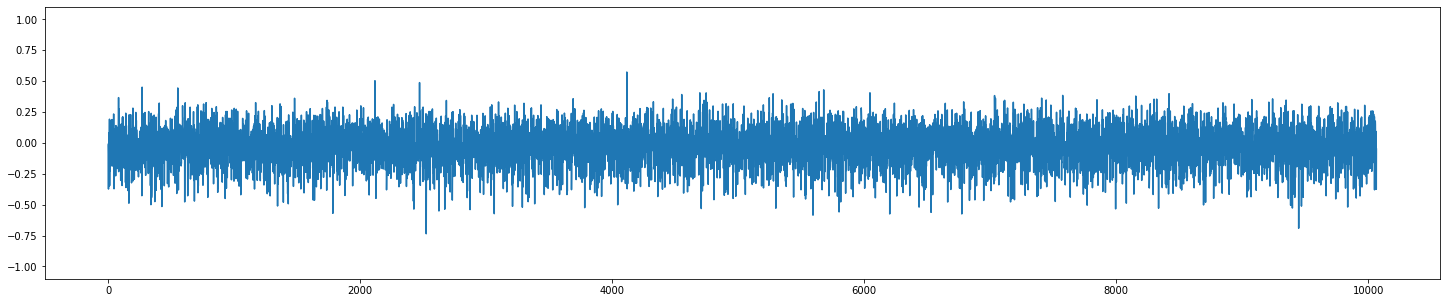

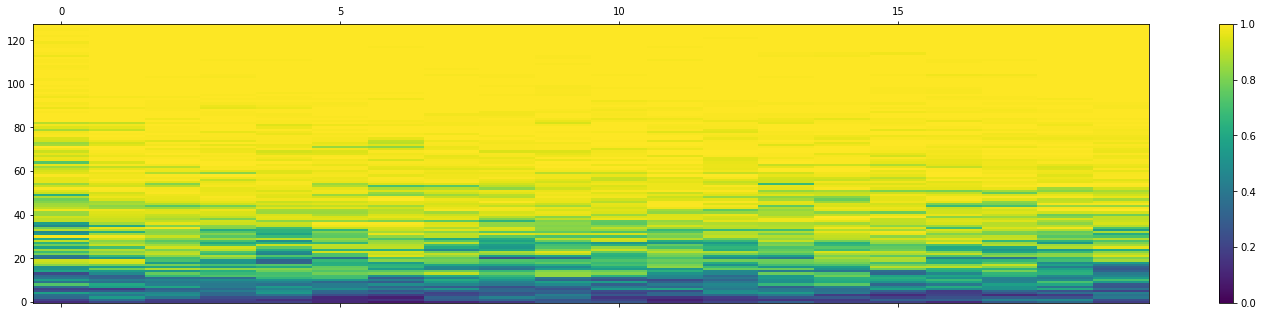

In [8]:
plt.figure(figsize=(25, 5))
plt.plot(track[::10000].cpu().detach().numpy())
plt.ylim((-1.1, 1.1))
plt.show()

mel_spec = mel_spec_new(track[::10000].to(device))
plt.figure(figsize=(25, 5))
plt.matshow(torch.tanh(eye_mat @ mel_spec).cpu().detach().numpy(), origin='lower', fignum=1, aspect='auto', vmin=0, vmax=1)
plt.colorbar()
plt.show()

IPython.display.Audio(filename="sample.mp3")